# pandas Foundations
https://www.datacamp.com/courses/pandas-foundations

### Loading the files

In [0]:
# links
URL1 = 'https://assets.datacamp.com/production/course_1639/datasets/world_ind_pop_data.csv'
URL2 = 'https://assets.datacamp.com/production/course_1639/datasets/world_population.csv'
URL3 = 'https://assets.datacamp.com/production/course_1639/datasets/messy_stock_data.tsv'
URL4 = 'https://assets.datacamp.com/production/course_1639/datasets/weather_data_austin_2010.csv'
URL5 = 'https://assets.datacamp.com/production/course_1639/datasets/NOAA_QCLCD_2011_hourly_13904.txt'
URL6 = 'https://assets.datacamp.com/production/course_1639/datasets/tips.csv'
URL7 = 'https://assets.datacamp.com/production/course_1639/datasets/percent-bachelors-degrees-women-usa.csv'
URL8 = 'https://assets.datacamp.com/production/course_1639/datasets/titanic.csv'
URL9 = 'https://assets.datacamp.com/production/course_1639/datasets/life_expectancy_at_birth.csv'
URL10 = 'https://assets.datacamp.com/production/course_1639/datasets/austin_airport_departure_data_2015_july.csv'

In [169]:
from urllib.request import urlretrieve

urlretrieve(URL1, 'world_ind_pop_data.csv')
urlretrieve(URL2, 'world_population.csv')
urlretrieve(URL3, 'messy_stock_data.tsv')
urlretrieve(URL4, 'weather_data_austin_2010.csv')
urlretrieve(URL5, 'NOAA_QCLCD_2011_hourly_13904.txt')
urlretrieve(URL6, 'tips.csv')
urlretrieve(URL7, 'bachelors.csv')
urlretrieve(URL8, 'titanic.csv')
urlretrieve(URL9, 'expectancy.csv')
urlretrieve(URL10, 'airport.csv')

('airport.csv', <http.client.HTTPMessage at 0x7f36dfc6d9e8>)

## 1. Data ingestion & inspection

### Inspecting your data

In [0]:
import pandas as pd

df = pd.read_csv('world_ind_pop_data.csv')

In [86]:
df.head()

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
0,Arab World,ARB,1960,9.249590e+07,31.285384
1,Caribbean small states,CSS,1960,4.190810e+06,31.597490
2,Central Europe and the Baltics,CEB,1960,9.140158e+07,44.507921
3,East Asia & Pacific (all income levels),EAS,1960,1.042475e+09,22.471132
4,East Asia & Pacific (developing only),EAP,1960,8.964930e+08,16.917679


In [87]:
df.tail()

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
13369,Virgin Islands (U.S.),VIR,2014,104170.0,95.203
13370,West Bank and Gaza,WBG,2014,4294682.0,75.026
13371,"Yemen, Rep.",YEM,2014,26183676.0,34.027
13372,Zambia,ZMB,2014,15721343.0,40.472
13373,Zimbabwe,ZWE,2014,15245855.0,32.501


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13374 entries, 0 to 13373
Data columns (total 5 columns):
CountryName                      13374 non-null object
CountryCode                      13374 non-null object
Year                             13374 non-null int64
Total Population                 13374 non-null float64
Urban population (% of total)    13374 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 522.5+ KB


### NumPy and pandas working together

You can use the DataFrame **attribute .values** to represent a DataFrame df as a **NumPy array**. You can also pass pandas data structures to NumPy methods.

Your job is to extract the values and store them in an array using the attribute .values. You'll then use those values as input into the NumPy np.log10() method to compute the base 10 logarithm of the population values. Finally, you will pass the entire pandas DataFrame into the same NumPy np.log10() method and compare the results.

In [89]:
df = pd.read_csv('world_population.csv')

# Import numpy
import numpy as np

# Create array of DataFrame values: np_vals
np_vals = df.values

# Create new array of base 10 logarithm values: np_vals_log10
np_vals_log10 = np.log10(np_vals)

# Create array of new DataFrame by passing df to np.log10(): df_log10
df_log10 = np.log10(df)

# Print original and new data containers
print('np_vals\t\t', type(np_vals))
print('np_vals_log10\t', type(np_vals_log10))
print('df\t\t', type(df))
print('df_log10\t', type(df_log10))

np_vals		 <class 'numpy.ndarray'>
np_vals_log10	 <class 'numpy.ndarray'>
df		 <class 'pandas.core.frame.DataFrame'>
df_log10	 <class 'pandas.core.frame.DataFrame'>


### Zip lists to build a DataFrame from scratch

In [0]:
list_keys = ['Country', 'Total']
list_values = [['United States', 'Soviet Union', 'United Kingdom'], [1118, 473, 273]]

In [91]:
# Zip the 2 lists together into one list of (key,value) tuples: zipped
zipped = list(zip(list_keys, list_values))

# Inspect the list using print()
print(zipped,'\n')

# Build a dictionary with the zipped list: data
data = dict(zipped)

# Build and inspect a DataFrame from the dictionary: df
df = pd.DataFrame(data)
print(df)

[('Country', ['United States', 'Soviet Union', 'United Kingdom']), ('Total', [1118, 473, 273])] 

          Country  Total
0   United States   1118
1    Soviet Union    473
2  United Kingdom    273


In [92]:
data = {column:values for column, values in zip(list_keys, list_values)}
df = pd.DataFrame(data)
df

,Country,Total
0,United States,1118
1,Soviet Union,473
2,United Kingdom,273


### Labeling your data

In [93]:
# Build a list of labels: list_labels
list_labels = ['name', 'population']

# Assign the list of labels to the columns attribute: df.columns
df.columns = list_labels

df

,name,population
0,United States,1118
1,Soviet Union,473
2,United Kingdom,273


### Building DataFrames with broadcasting

In [0]:
cities = ['Manheim', 'Preston park', 'Biglerville', 'Indiana', 'Curwensville', 'Crown', 'Harveys lake', 'Mineral springs', 'Cassville', 'Hannastown', 'Saltsburg', 'Tunkhannock', 'Pittsburgh', 'Lemasters', 'Great bend']

In [95]:
# Make a string with the value 'PA': state
state = 'PA'

# Construct a dictionary: data
data = {'state': state, 'city': cities}

# Construct a DataFrame from dictionary data: df
df = pd.DataFrame(data)

# Print the DataFrame
print(df)

               city state
0           Manheim    PA
1      Preston park    PA
2       Biglerville    PA
3           Indiana    PA
4      Curwensville    PA
5             Crown    PA
6      Harveys lake    PA
7   Mineral springs    PA
8         Cassville    PA
9        Hannastown    PA
10        Saltsburg    PA
11      Tunkhannock    PA
12       Pittsburgh    PA
13        Lemasters    PA
14       Great bend    PA


### Reading a flat file

In [96]:
# Read in the file: df1
df1 = pd.read_csv('world_population.csv')

# Create a list of the new column labels: new_labels
new_labels = ['year', 'population']

# Read in the file, specifying the header and names parameters: df2
df2 = pd.read_csv('world_population.csv', header=0, names=new_labels)

# Print both the DataFrames
print(df1)
print(df2)

   Year  Total Population
0  1960      3.034971e+09
1  1970      3.684823e+09
2  1980      4.436590e+09
3  1990      5.282716e+09
4  2000      6.115974e+09
5  2010      6.924283e+09
   year    population
0  1960  3.034971e+09
1  1970  3.684823e+09
2  1980  4.436590e+09
3  1990  5.282716e+09
4  2000  6.115974e+09
5  2010  6.924283e+09


### Delimiters, headers, and extensions

In [97]:
# Read the raw file as-is: df1
df1 = pd.read_csv('messy_stock_data.tsv')

# Print the output of df1.head()
print(df1.head())

# Read in the file with the correct parameters: df2
df2 = pd.read_csv('messy_stock_data.tsv', delimiter=' ', header=3, comment='#')

# Print the output of df2.head()
print(df2.head())

# Save the cleaned up DataFrame to a CSV file without the index
#df2.to_csv(file_clean, index=False)

# Save the cleaned up DataFrame to an excel file without the index
#df2.to_excel('file_clean.xlsx', index=False)

                                                   The following stock data was collect on 2016-AUG-25 from an unknown source
These kind of ocmments are not very useful                                                  are they?                        
probably should just throw this line away too          but not the next since those are column labels                        
name Jan Feb Mar Apr May Jun Jul Aug Sep Oct No...                                                NaN                        
# So that line you just read has all the column...                                                NaN                        
IBM 156.08 160.01 159.81 165.22 172.25 167.15 1...                                                NaN                        
     name     Jan     Feb     Mar     Apr     May     Jun     Jul     Aug  \
0     IBM  156.08  160.01  159.81  165.22  172.25  167.15  164.75  152.77   
1    MSFT   45.51   43.08   42.13   43.47   47.53   45.96   45.61   45.51   
2  GOOGLE  51

### Plotting series using pandas

In [0]:
df = pd.read_csv('weather_data_austin_2010.csv',index_col='Date',parse_dates=True,infer_datetime_format=True)
temp = df['2010-08'].copy()
temp.reset_index( inplace=True)
temp.columns = ['','Temperature (deg F)','','']
df = temp['Temperature (deg F)']

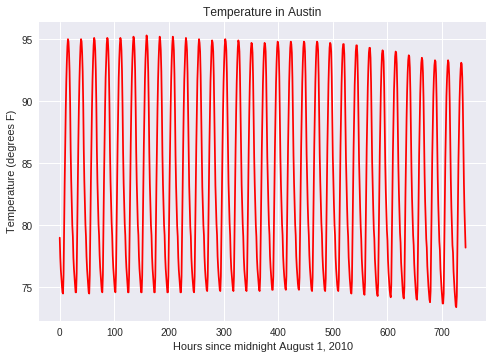

In [99]:
import matplotlib.pyplot as plt

# Create a plot with color='red'
df.plot(color='red')

# Add a title
plt.title('Temperature in Austin')

# Specify the x-axis label
plt.xlabel('Hours since midnight August 1, 2010')

# Specify the y-axis label
plt.ylabel('Temperature (degrees F)')

# Display the plot
plt.show()

### Plotting DataFrames

In [0]:
df = pd.read_csv('weather_data_austin_2010.csv',index_col='Date',parse_dates=True,infer_datetime_format=True)
temp = df['2010-08'].copy()
labels = ['Temperature (deg F)', 'Dew Point (deg F)', 'Pressure (atm)']
temp.columns = labels
temp.reset_index( inplace=True)
df = temp[labels]

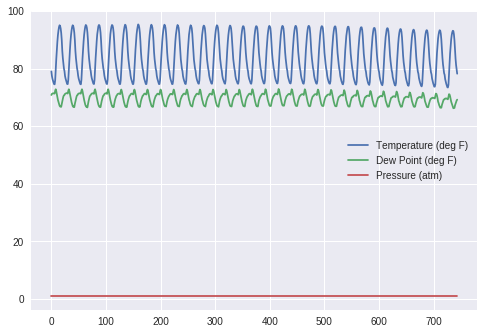

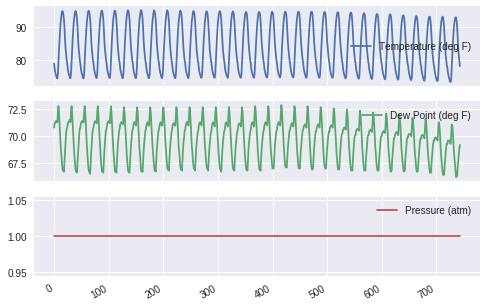

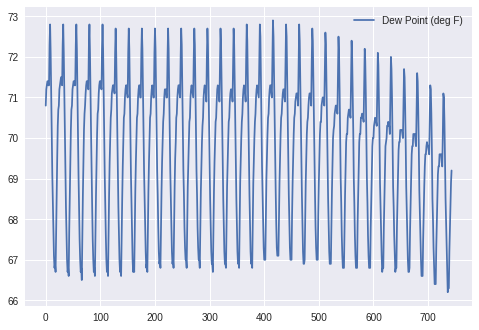

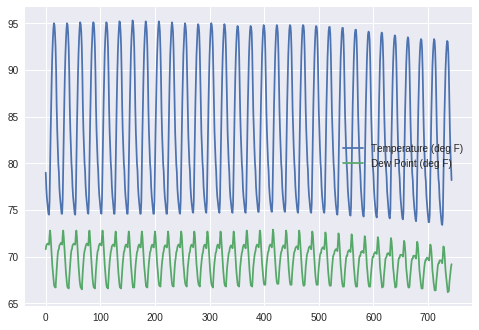

In [101]:
# Plot all columns (default)
df.plot()
plt.show()

# Plot all columns as subplots
df.plot(subplots=True)
plt.show()

# Plot just the Dew Point data
column_list1 = ['Dew Point (deg F)']
df[column_list1].plot()
plt.show()

# Plot the Dew Point and Temperature data, but not the Pressure data
column_list2 = ['Temperature (deg F)','Dew Point (deg F)']
df[column_list2].plot()
plt.show()


## 2. Exploratory data analysis

### pandas line plots

In [0]:
list_keys = ['Month', 'AAPL', 'GOOG', 'IBM']
list_values = [['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
               [110.64,125.43,125.97,127.29,128.76,127.81,125.34,113.39,112.80,113.36,118.16,111.73],
              [512.42,537.99,559.72,540.50,535.24,532.92,590.09,636.84,617.93,663.59,735.39,755.35],
              [156.08,160.01,159.81,165.22,172.25,167.15,164.75,152.77,145.36,146.11,137.21,137.96]]
data = {column:values for column, values in zip(list_keys, list_values)}
df = pd.DataFrame(data)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


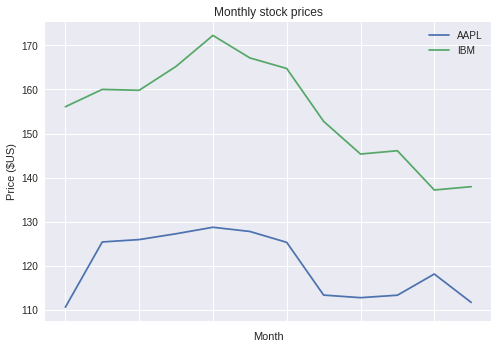

In [103]:
# Create a list of y-axis column names: y_columns
y_columns = ['AAPL' ,'IBM']

# Generate a line plot
df.plot(x='Month', y=y_columns)

# Add the title
plt.title('Monthly stock prices')

# Add the y-axis label
plt.ylabel('Price ($US)')

# Display the plot
plt.show()

### pandas scatter plots

In [0]:
labels = ['mpg', 'cyl', 'displ', 'hp', 'weight', 'accel', 'yr', 'origin', 'name']
df = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',header=None, names=labels, sep='\s+')
df['hp'] = pd.to_numeric(df.hp, errors='coerce')
df.to_csv('cars.csv')

In [0]:
sizes = np.array([ 51.12,  56.78,  49.16,  49.07,  49.53,  78.46,  78.93,  77.41,
        81.53,  61.71,  52.86,  54.23,  58.89,  39.65,  23.43,  33.42,
        32.04,  27.87,  18.89,  14.02,  29.73,  24.59,  23.49,  20.78,
        29.19,  88.68,  79.73,  79.95,  93.23,  18.89,  21.34,  20.67,
        28.89,  49.24,  46.14,  45.4 ,  45.01,  73.76,  82.97,  71.85,
        69.85, 102.22,  93.78, 110.  ,  36.53,  24.14,  44.85,  41.03,
        20.52,  18.77,  17.91,  17.75,  13.09,  10.83,  14.  ,  15.91,
        21.61,  18.82,  21.15,  24.14,  20.63,  76.06,  80.06,  71.19,
        70.98,  56.14,  89.37,  84.39,  82.67,  81.41,  22.6 ,  63.07,
        69.92,  76.77,  69.21,  35.82,  26.25,  36.95,  19.95,  23.88,
        21.8 ,  26.15,  19.5 ,  18.36,  69.99,  56.14,  66.22,  68.02,
        59.4 , 102.1 ,  82.97,  79.26,  74.75,  93.35, 102.06,  60.79,
        40.56,  44.74,  36.11,  38.  ,  35.11,  15.83, 103.96, 100.21,
        90.18,  84.27,  32.39,  21.62,  24.  ,  23.56,  18.78,  22.22,
        25.44,  21.36,  69.38,  76.2 ,  14.51,  19.39,  27.76,  34.25,
        48.1 ,  29.46,  32.81,  55.9 ,  40.06,  35.04,  46.34,  15.83,
        25.01,  14.03,  26.9 ,  59.52,  54.92,  54.35,  71.4 ,  91.93,
        82.71,  89.56,  75.45,  20.5 ,  16.04,  22.03,  11.32,  16.7 ,
        18.8 ,  18.5 ,  21.  ,  25.79,  23.8 ,  16.65,  44.36,  49.82,
        49.04,  41.52,  90.73,  82.08,  84.24,  90.3 ,  63.56,  63.23,
        57.93,  59.65,  38.45,  43.2 ,  41.81,  19.62,  29.  ,  35.35,
        27.97,  30.4 ,  20.58,  26.97,  37.07,  15.62,  42.93,  30.22,
        36.41,  36.11,  29.7 ,  13.42,  25.28,  20.52,  27.54,  21.17,
        20.19,  73.97,  73.1 ,  65.36,  73.97,  43.52,  46.81,  37.77,
        39.63,  17.24,  19.5 ,  15.62,  13.42,  55.5 ,  53.18,  55.32,
        42.45,  13.87,  16.49,  19.34,  27.39,  41.31,  64.63,  44.52,
        35.74,  60.76,  79.88,  68.46,  62.36,  58.71,  17.41,  19.34,
        13.87,  22.03,  15.75,  62.68,  68.63,  71.36,  76.81,  51.59,
        48.84,  54.86,  51.74,  74.15,  72.23,  77.88,  78.24,  15.67,
        31.26,  21.36,  31.6 ,  17.51,  17.93,  16.41,  19.97,  32.99,
        28.15,  30.8 ,  16.41,  13.49,  16.41,  17.84,  13.49,  47.15,
        58.08,  53.06,  52.03,  41.44,  36.6 ,  30.8 ,  48.98,  42.9 ,
        47.57,  39.24,  54.56,  48.41,  48.84,  49.41,  42.77,  69.31,
        19.34,  27.29,  22.03,  20.71,  26.34,  31.37,  33.94,  24.08,
        33.35,  41.05,  32.53,  48.41,  16.49,  18.98,  43.84,  37.22,
        34.77,  44.38,  47.01,  61.39,  57.77,  65.13,  61.08,  79.15,
        68.43,  54.11,  64.63,  15.43,  16.24,  15.27,  29.68,  51.88,
        63.33,  42.37,  48.7 ,  20.15,  19.25,  16.99,  18.89,  29.68,
        28.04,  30.35,  27.2 ,  19.14,  16.13,  18.71,  16.97,  29.86,
        34.29,  37.55,  47.59,  19.93,  30.6 ,  26.9 ,  24.67,  21.36,
        18.54,  32.64,  18.54,  18.1 ,  22.7 ,  36.23,  43.98,  14.25,
        19.16,  14.17,  35.26,  24.38,  26.02,  21.83,  25.81,  28.91,
        28.58,  30.92,  23.68,  12.82,  14.64,  12.9 ,  17.75,  16.24,
        17.5 ,  16.41,  20.43,  17.41,  23.58,  19.97,  20.34,  22.99,
        28.47,  28.91,  43.44,  41.58,  35.02,  35.74,  48.56,  57.77,
        38.99,  49.99,  28.25,  29.02,  23.88,  27.61,  26.55,  31.14,
        34.18,  16.32,  17.07,  16.16,  18.8 ,  18.8 ,  19.43,  20.24,
        20.98,  16.08,  16.08,  16.57,  36.11,  37.85,  27.82,  33.46,
        29.57,  23.39,  36.23,  32.41,  18.89,  21.93,  28.69,  30.8 ])

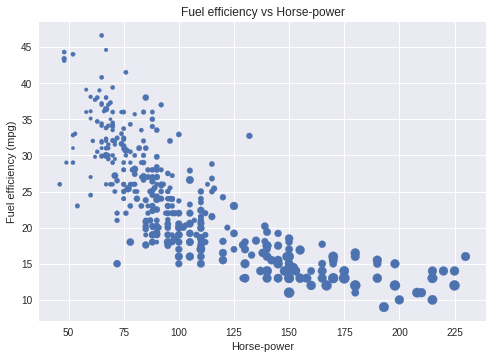

In [106]:
# Generate a scatter plot
df.plot(kind='scatter', x='hp', y='mpg', s=sizes)

# Add the title
plt.title('Fuel efficiency vs Horse-power')

# Add the x-axis label
plt.xlabel('Horse-power')

# Add the y-axis label
plt.ylabel('Fuel efficiency (mpg)')

# Display the plot
plt.show()

### pandas box plots

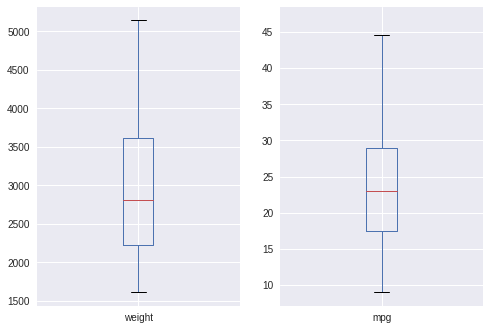

In [107]:
# Make a list of the column names to be plotted: cols
cols = ['weight' ,'mpg']

# Generate the box plots
df[cols].plot(kind='box', subplots=True)

# Display the plot
plt.show()

### pandas hist, pdf and cdf

In [0]:
df = pd.read_csv('tips.csv')

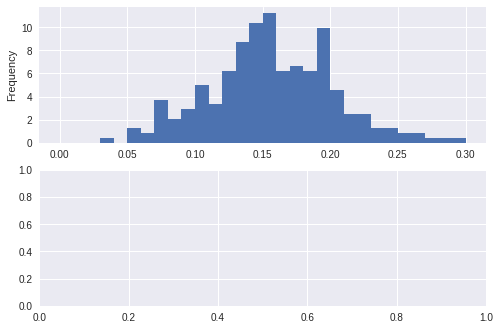

In [109]:
# This formats the plots such that they appear on separate rows
fig, axes = plt.subplots(nrows=2, ncols=1)

# Plot the PDF
df.fraction.plot(ax=axes[0], kind='hist', normed=True, bins=30, range=(0,.3))
plt.show()

# Plot the CDF
df.fraction.plot(ax=axes[1], kind='hist', normed=True, cumulative=True, bins=30, range=(0,.3))
plt.show()

### Statistical exploratory data analysis

#### Fuel efficiency: median miles-per-galon

In [0]:
df = pd.read_csv('cars.csv')

In [111]:
df.mpg.median()

23.0

### Bachelor's degrees awarded to women: mean per year

In [0]:
df = pd.read_csv('bachelors.csv')

0.8
19.0


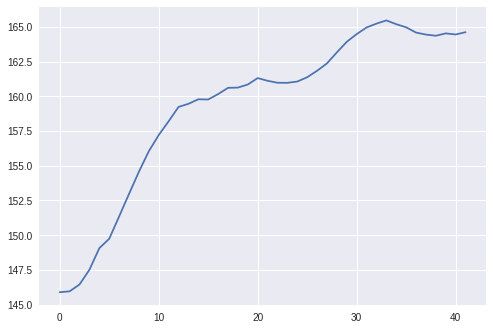

In [113]:
# Print the minimum value of the Engineering column
print(df.Engineering.min())

# Print the maximum value of the Engineering column
print(df.Engineering.max())

# Construct the mean percentage per year: mean
mean = df.mean(axis='columns')

# Plot the average percentage per year
mean.plot()

# Display the plot
plt.show()

### Median vs mean

In [0]:
df = pd.read_csv('titanic.csv')

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64


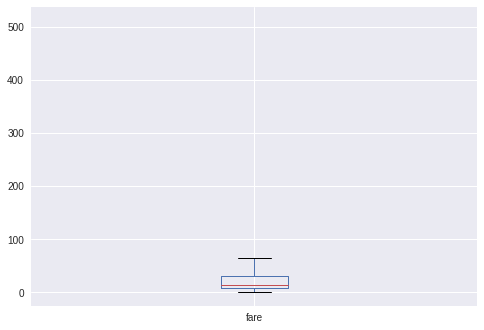

In [115]:
# Print summary statistics of the fare column with .describe()
print(df.fare.describe())

# Generate a box plot of the fare column
df.fare.plot(kind='box')

# Show the plot
plt.show()

### Quantiles

In [0]:
df = pd.read_csv('expectancy.csv')

208
      Unnamed: 0   1800   1801   1802  1803  1804   1805   1806   1807  1808  \
0.05       12.95  25.40  25.30  25.20  25.2  25.2  25.40  25.40  25.40  25.3   
0.95      246.05  37.92  37.35  38.37  38.0  38.3  38.37  38.37  38.37  38.0   

       ...      2007   2008    2009    2010   2011    2012    2013   2014  \
0.05   ...     53.07  53.60  54.235  54.935  55.97  56.335  56.705  56.87   
0.95   ...     80.73  80.93  81.200  81.365  81.60  81.665  81.830  82.00   

        2015     2016  
0.05  57.855  59.2555  
0.95  82.100  82.1650  

[2 rows x 218 columns]


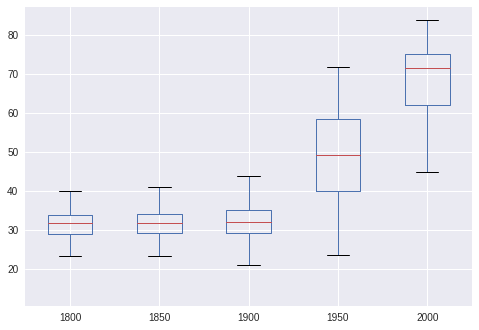

In [117]:
# Print the number of countries reported in 2015
print(df['2015'].count())

# Print the 5th and 95th percentiles
print(df.quantile([0.05, 0.95]))

# Generate a box plot
years = ['1800','1850','1900','1950','2000']
df[years].plot(kind='box')
plt.show()

### Standard deviation of temperature

In [0]:
df = pd.read_csv('weather_data_austin_2010.csv',index_col='Date',parse_dates=True,infer_datetime_format=True)
january = df['2010-01'].Temperature.copy()
march = df['2010-03'].Temperature.copy()

In [119]:
# Print the mean of the January and March data
print('January mean:\t',january.mean(),'\tMarch mean:\t', march.mean())

# Print the standard deviation of the January and March data
print('January std:\t',january.std(),'\tMarch std:\t', march.std())

January mean:	 49.987365591397854 	March mean:	 60.89555854643337
January std:	 5.907567658069529 	March std:	 6.479669152231178


### Separate and summarize

In [0]:
df = pd.read_csv('cars.csv')
df.origin = df.origin.replace(to_replace={1:'US',2:'Europe' ,3: 'Asia'})

In [130]:
# Compute the global mean and global standard deviation: global_mean, global_std
global_std = df.std()

# Filter the US population from the origin column: us
us = df[df.origin == 'US']

# Compute the US mean and US standard deviation: us_mean, us_std
us_mean = us.mean()
us_std = us.std()

# Print the differences
print(us_mean - global_mean)
print(us_std - global_std)

Unnamed: 0    -14.656627
accel          -0.534356
cyl             0.794222
displ          52.475727
hp             14.579592
mpg            -3.431039
origin               NaN
weight        391.507104
yr             -0.399608
dtype: float64
Unnamed: 0    -0.214210
mpg           -1.413092
cyl           -0.039580
displ         -5.767999
hp             1.406630
weight       -52.049268
accel         -0.006577
yr            -0.020533
dtype: float64


### Separate and plot

In [0]:
titanic = pd.read_csv('titanic.csv')

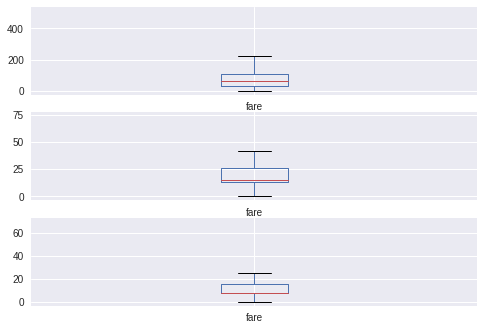

In [132]:
# Display the box plots on 3 separate rows and 1 column
fig, axes = plt.subplots(nrows=3, ncols=1)

# Generate a box plot of the fare prices for the First passenger class
titanic.loc[titanic['pclass'] == 1].plot(ax=axes[0], y='fare', kind='box')

# Generate a box plot of the fare prices for the Second passenger class
titanic.loc[titanic['pclass'] == 2].plot(ax=axes[1], y='fare', kind='box')

# Generate a box plot of the fare prices for the Third passenger class
titanic.loc[titanic['pclass'] == 3].plot(ax=axes[2], y='fare', kind='box')

# Display the plot
plt.show()

## 3. Time series in pandas

### Reading and slicing times


In [0]:
filename = 'weather_data_austin_2010.csv'

In [0]:
df1 = pd.read_csv(filename)

df2 = pd.read_csv(filename, parse_dates=['Date'])

df3 = pd.read_csv(filename, index_col='Date', parse_dates=True)

In [135]:
df1.head()

,Temperature,DewPoint,Pressure,Date
0,46.2,37.5,1.0,20100101 00:00
1,44.6,37.1,1.0,20100101 01:00
2,44.1,36.9,1.0,20100101 02:00
3,43.8,36.9,1.0,20100101 03:00
4,43.5,36.8,1.0,20100101 04:00


In [137]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 4 columns):
Temperature    8759 non-null float64
DewPoint       8759 non-null float64
Pressure       8759 non-null float64
Date           8759 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3)
memory usage: 273.8 KB


In [140]:
df3.loc['2010-Aug-01'].head()

,Temperature,DewPoint,Pressure
Date,,,
2010-08-01 00:00:00,79.0,70.8,1.0
2010-08-01 01:00:00,77.4,71.2,1.0
2010-08-01 02:00:00,76.4,71.3,1.0
2010-08-01 03:00:00,75.7,71.4,1.0
2010-08-01 04:00:00,75.1,71.4,1.0


### Creating and using a DatetimeIndex

In [0]:
date_list = ['20100101 00:00', '20100101 01:00', '20100101 02:00', '20100101 03:00', '20100101 04:00', '20100101 05:00', '20100101 06:00', '20100101 07:00', '20100101 08:00', '20100101 09:00']
temperature_list = [46.2, 44.6, 44.1, 43.8, 43.5, 43.0, 43.1, 42.3, 42.5, 45.9]

In [148]:
# Prepare a format string: time_format
time_format = '%Y-%m-%d %H:%M'

# Convert date_list into a datetime object: my_datetimes
my_datetimes = pd.to_datetime(date_list, format=time_format)  

# Construct a pandas Series using temperature_list and my_datetimes: time_series
time_series = pd.Series(temperature_list, index=my_datetimes)

time_series

2010-01-01 00:00:00    46.2
2010-01-01 01:00:00    44.6
2010-01-01 02:00:00    44.1
2010-01-01 03:00:00    43.8
2010-01-01 04:00:00    43.5
2010-01-01 05:00:00    43.0
2010-01-01 06:00:00    43.1
2010-01-01 07:00:00    42.3
2010-01-01 08:00:00    42.5
2010-01-01 09:00:00    45.9
dtype: float64

### Partial string indexing and slicing

In [0]:
ts0 = df3.Temperature.copy()

In [154]:
# Extract the hour from 9pm to 10pm on '2010-10-11': ts1
ts1 = ts0.loc['2010-10-11 21:00:00':'2010-10-11 22:00:00']

# Extract '2010-07-04' from ts0: ts2
ts2 = ts0.loc['2010-07-04']

# Extract data from '2010-12-15' to '2010-12-31': ts3
ts3 = ts0.loc['2010-12-15':'2010-12-31']

print(ts1.head(),'\n')
print(ts2.head(),'\n')
print(ts3.head(),'\n')

Date
2010-10-11 21:00:00    69.0
2010-10-11 22:00:00    67.7
Name: Temperature, dtype: float64 

Date
2010-07-04 00:00:00    77.6
2010-07-04 01:00:00    76.3
2010-07-04 02:00:00    75.5
2010-07-04 03:00:00    74.9
2010-07-04 04:00:00    74.6
Name: Temperature, dtype: float64 

Date
2010-12-15 00:00:00    48.0
2010-12-15 01:00:00    47.2
2010-12-15 02:00:00    46.5
2010-12-15 03:00:00    46.0
2010-12-15 04:00:00    45.6
Name: Temperature, dtype: float64 



### Resampling and frequency

In [156]:
# Downsample to 6 hour data and aggregate by mean: df1
df1 = df3.Temperature.resample('6h').mean()

# Downsample to daily data and count the number of data points: df2
df2 = df3.Temperature.resample('D').count()

print(df1.head(),'\n')
print(df2.head(),'\n')

Date
2010-01-01 00:00:00    44.200000
2010-01-01 06:00:00    45.933333
2010-01-01 12:00:00    57.766667
2010-01-01 18:00:00    49.450000
2010-01-02 00:00:00    44.516667
Freq: 6H, Name: Temperature, dtype: float64 

Date
2010-01-01    24
2010-01-02    24
2010-01-03    24
2010-01-04    24
2010-01-05    24
Freq: D, Name: Temperature, dtype: int64 



### Separating and resampling

In [164]:
# Extract temperature data for August: august
august = df3['2010-8'].Temperature

# Downsample to obtain only the daily highest temperatures in August: august_highs
august_highs = august.resample('D').max()

# Extract temperature data for February: february
february = df3['2010-2'].Temperature

# Downsample to obtain the daily lowest temperatures in February: february_lows
february_lows = february.resample('D').min()

print('August mean highest:',august_highs.mean())
print('February mean lowest:',february_lows.mean())

August mean highest: 94.60645161290323
February mean lowest: 46.29285714285714


### Rolling mean and frequency

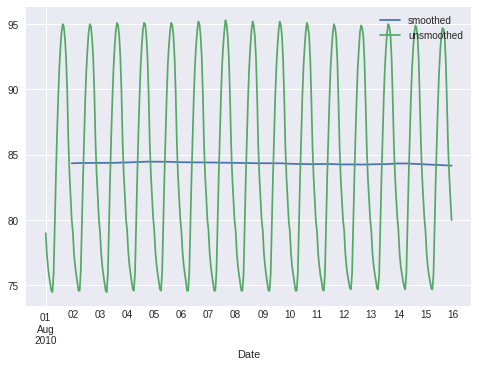

In [166]:
# Extract data from 2010-Aug-01 to 2010-Aug-15: unsmoothed
unsmoothed = df3['Temperature']['2010-Aug-01':'2010-Aug-15']

# Apply a rolling mean with a 24 hour window: smoothed
smoothed = unsmoothed.rolling(window=24).mean()

# Create a new DataFrame with columns smoothed and unsmoothed: august
august = pd.DataFrame({'smoothed':smoothed, 'unsmoothed':unsmoothed})

# Plot both smoothed and unsmoothed data using august.plot().
august.plot()
plt.show()

### Resample and roll with it

In [167]:
# Extract the August 2010 data: august
august = df3['Temperature']['2010-08']

# Resample to daily data, aggregating by max: daily_highs
daily_highs = august.resample('D').max()

# Use a rolling 7-day window with method chaining to smooth the daily high temperatures in August
daily_highs_smoothed = daily_highs.rolling(window=7).mean()
print(daily_highs_smoothed)

Date
2010-08-01          NaN
2010-08-02          NaN
2010-08-03          NaN
2010-08-04          NaN
2010-08-05          NaN
2010-08-06          NaN
2010-08-07    95.114286
2010-08-08    95.142857
2010-08-09    95.171429
2010-08-10    95.171429
2010-08-11    95.157143
2010-08-12    95.128571
2010-08-13    95.100000
2010-08-14    95.042857
2010-08-15    94.971429
2010-08-16    94.900000
2010-08-17    94.857143
2010-08-18    94.828571
2010-08-19    94.814286
2010-08-20    94.785714
2010-08-21    94.757143
2010-08-22    94.742857
2010-08-23    94.714286
2010-08-24    94.642857
2010-08-25    94.542857
2010-08-26    94.428571
2010-08-27    94.271429
2010-08-28    94.100000
2010-08-29    93.914286
2010-08-30    93.742857
2010-08-31    93.571429
Freq: D, Name: Temperature, dtype: float64
